In [ ]:
# dataset from: https://www.kaggle.com/c/bike-sharing-demand

### Bike Sharing Demand Prediction

The study of variables that affect the use of bike-sharing services and the demand for bikes at various times and locations is referred to as bike-sharing demand analysis. Understanding usage patterns and trends for bikes is the goal of this investigation, which also aims to forecast future demand. The ability of statistical machine-learning approaches to analyse the provided data will be examined in this notebook.

Learning Objectives:

- Based on historical data and other pertinent parameters, anticipate with accuracy the number of bike rentals for a specific time period and location.
- Determine and examine the important variables that affect the demand for bike rentals, such as weather, holidays, and events.
- Utilising regression analysis to create and assess prediction models that can accurately forecast the demand for bike rentals.
- Utilising the outcomes of the forecasts will help bike-sharing companies satisfy consumer demand and increase income by optimising bike inventory and resources.
- Maintain a constant eye on forecasting precision, analyse it, enhance model

#### What is forecasting demand for bike sharing?
The goal of bike-sharing demand forecasting is to give bike-sharing businesses the knowledge and resources they need to manage their business operations and make data-driven choices.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('bike_share.csv')
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

Data Description:
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather -
            1: Clear, Few clouds, Partly cloudy, Partly cloudy
            2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
            3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
            4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [ ]:
#Season-wise total rentals
season_rental = df.groupby('season')['count'].sum()
season_rental

season
1    312498
2    588282
3    640662
4    544034
Name: count, dtype: int64

<Axes: xlabel='season'>

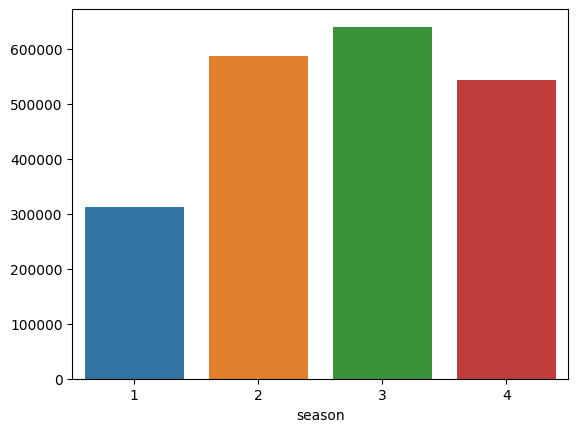

In [ ]:
sns.barplot(x=season_rental.index, y=season_rental.values)

The total rentals were the highest during fall

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.weekday

In [ ]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  month  day  
0        81        0.0       3          13     16      1    5  
1        80        0.0       8          32     40      1    5  
2        80        0.0       5          27     32      1    5  
3        75        0.0       3          10     13      1    5  
4        75        0.0       0           1      1      1    5

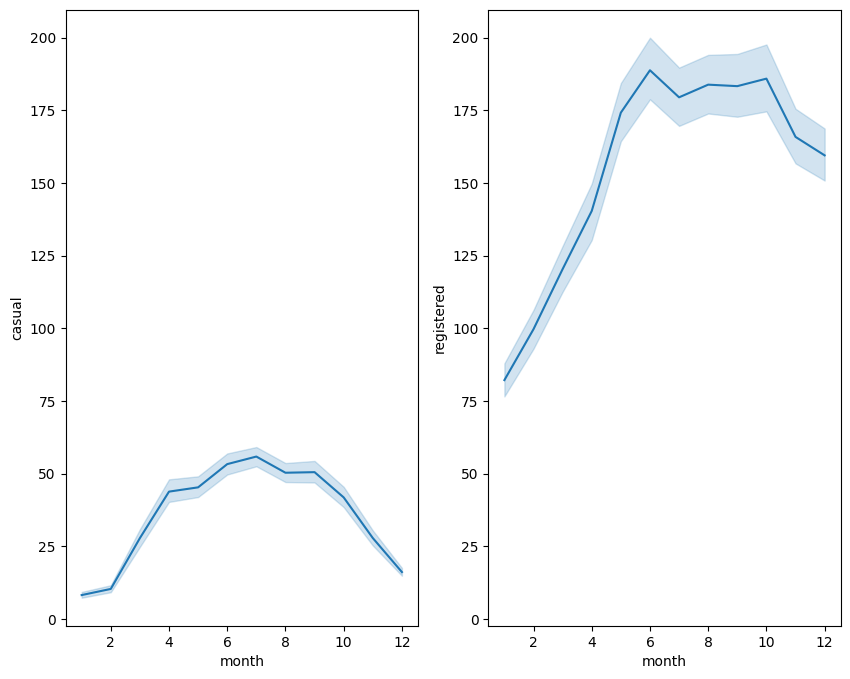

In [ ]:
#Registered vs unregistered user rentals based on month
plt.figure(figsize=(10,8))
ax1 = plt.subplot(1,2,1)
sns.lineplot(data=df, x='month', y='casual', markers='o')
ax1 = plt.subplot(1,2,2,sharey=ax1)
sns.lineplot(data=df, x='month', y='registered', markers='o')
plt.show()

- Unregistered rentals peak during the months of June through July, post the uptrend in the beginning of the year.
- There are more of registered rentals compared to the casual ones; the former also showcases an upward trend through Jan to June and thereafter, slows down a bit.

<Axes: xlabel='temp', ylabel='count'>

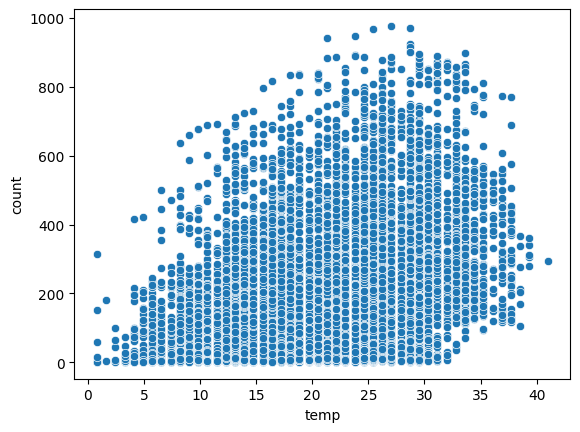

In [ ]:
#Temperature and bike rentals correlation
sns.scatterplot(data=df, x='temp', y='count')

<Axes: xlabel='temp', ylabel='count'>

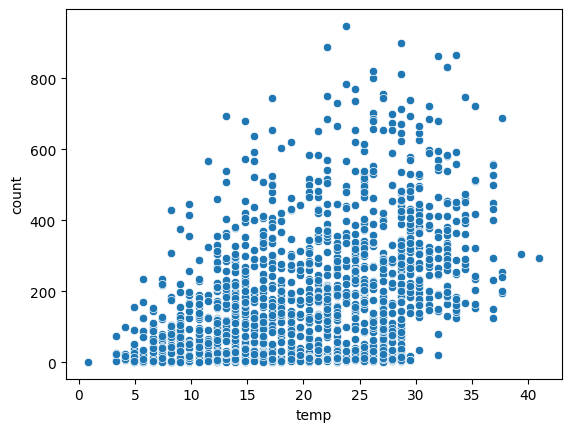

In [ ]:
sample = df.sample(1500)
sns.scatterplot(data=sample, x='temp', y='count')

In [ ]:
temp_rent_corr = df[['temp','count']].corr()
temp_rent_corr

temp     count
temp   1.000000  0.394454
count  0.394454  1.000000

The rentals tend to decrease when the temperature is extreme which is intuitive in itself.

In [ ]:
#Categorical encoding
season_type = pd.get_dummies(df['season'], prefix = 'season_', drop_first = True)
weather_type = pd.get_dummies(df['weather'], prefix = 'weather_', drop_first = True)

In [ ]:
df = pd.concat([df, season_type, weather_type], axis = 1)
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  month  day  season__2  \
0        81        0.0       3          13     16      1    5          0   
1        80        0.0       8          32     40      1    5          0   
2        80        0.0       5          27     32      1    5          0   
3        75        0.0       3          10     13      1    5          0   
4        75        0.0       0           1      1      1    5          0   

   season__3  season__4  weather__2  weather__3  weather__4  
0          0          0           0           0           0  
1          0          0           0           0           0  
2          0          0           0           0           0  
3          0          0           0           0           0  
4          0          0           0           0           0

In [ ]:
df["Quarter_JanFebMar"] = df["month"].apply(lambda x: 1 if x<=3 else 0)
df["Quarter_AprMayJun"] = df["month"].apply(lambda x: 1 if 4<=x<=6 else 0)
df["Quarter_JulAugSep"] = df["month"].apply(lambda x: 1 if 7<=x<=9 else 0)

In [ ]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  ...  day  season__2  season__3  season__4  \
0        81        0.0       3  ...    5          0          0          0   
1        80        0.0       8  ...    5          0          0          0   
2        80        0.0       5  ...    5          0          0          0   
3        75        0.0       3  ...    5          0          0          0   
4        75        0.0       0  ...    5          0          0          0   

   weather__2  weather__3  weather__4  Quarter_JanFebMar  Quarter_AprMayJun  \
0           0           0           0                  1                  0   
1           0           0           0                  1                  0   
2           0           0           0                  1                  0   
3           0           0           0                  1                  0   
4           0           0           0                  1                  0   

   Quarter_JulAugSep  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 23 columns]

In [ ]:
df["weekend"] = df["day"].apply(lambda x: 0 if 0<=x<=4 else 1) # Monday-0 to Sunday-6

In [ ]:
df = df.drop(columns=['datetime', 'season', 'weather', 'month', 'day'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   holiday            10886 non-null  int64  
 1   workingday         10886 non-null  int64  
 2   temp               10886 non-null  float64
 3   atemp              10886 non-null  float64
 4   humidity           10886 non-null  int64  
 5   windspeed          10886 non-null  float64
 6   casual             10886 non-null  int64  
 7   registered         10886 non-null  int64  
 8   count              10886 non-null  int64  
 9   season__2          10886 non-null  uint8  
 10  season__3          10886 non-null  uint8  
 11  season__4          10886 non-null  uint8  
 12  weather__2         10886 non-null  uint8  
 13  weather__3         10886 non-null  uint8  
 14  weather__4         10886 non-null  uint8  
 15  Quarter_JanFebMar  10886 non-null  int64  
 16  Quarter_AprMayJun  108

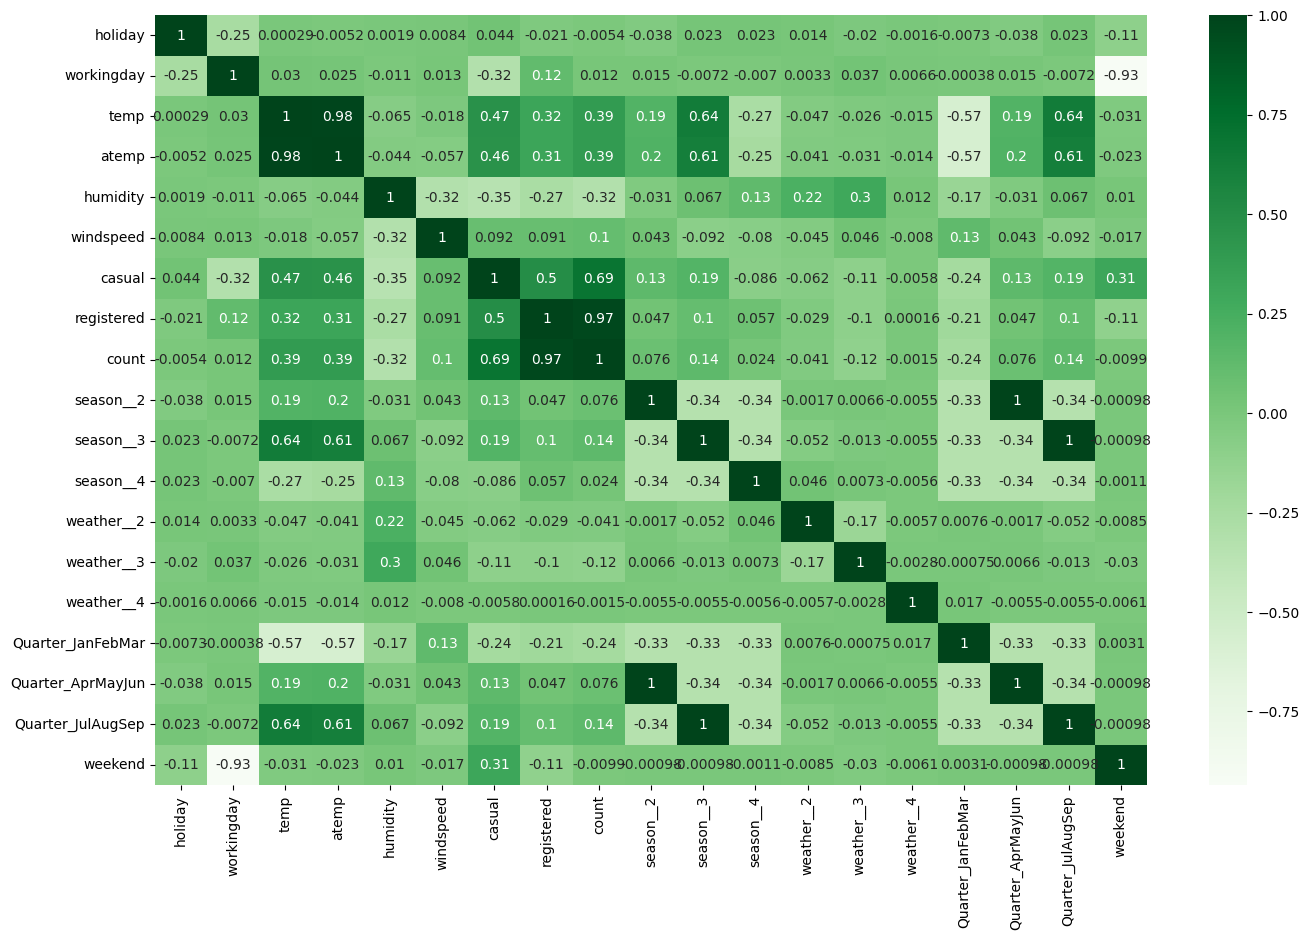

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="Greens")
plt.show()

In [ ]:
#Dropping column temp since it is very highly collinear with the column atemp.
#Further,the column atemp is more appropriate for modelling compared to column temp from human perspective.

df.drop(columns=["temp"],axis=1,inplace =True)

In [ ]:
scaler = MinMaxScaler()
numeric_var = ['atemp','humidity','windspeed']
df[numeric_var] = scaler.fit_transform(df[numeric_var])

# Analysing the train dataframe after scaling
df.head()

holiday  workingday     atemp  humidity  windspeed  casual  registered  \
0        0           0  0.305068      0.81        0.0       3          13   
1        0           0  0.288064      0.80        0.0       8          32   
2        0           0  0.288064      0.80        0.0       5          27   
3        0           0  0.305068      0.75        0.0       3          10   
4        0           0  0.305068      0.75        0.0       0           1   

   count  season__2  season__3  season__4  weather__2  weather__3  weather__4  \
0     16          0          0          0           0           0           0   
1     40          0          0          0           0           0           0   
2     32          0          0          0           0           0           0   
3     13          0          0          0           0           0           0   
4      1          0          0          0           0           0           0   

   Quarter_JanFebMar  Quarter_AprMayJun  Quarter_JulAugSep  weekend  
0                  1                  0                  0        1  
1                  1                  0                  0        1  
2                  1                  0                  0        1  
3                  1                  0                  0        1  
4                  1                  0                  0        1

In [ ]:
x = df.drop('count', axis=1)
y = df['count']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 123)

Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [ ]:
# Running RFE with the output number of the variable equal to 12
lm = LinearRegression()
lm.fit(xtrain, ytrain)

rfe = RFE(lm, n_features_to_select=12)             # running RFE
rfe = rfe.fit(xtrain, ytrain)

list(zip(xtrain.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('season__2', False, 4),
 ('season__3', True, 1),
 ('season__4', True, 1),
 ('weather__2', False, 2),
 ('weather__3', False, 5),
 ('weather__4', False, 6),
 ('Quarter_JanFebMar', True, 1),
 ('Quarter_AprMayJun', False, 3),
 ('Quarter_JulAugSep', True, 1),
 ('weekend', True, 1)]

<ipython-input-44-de24c2c4615c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


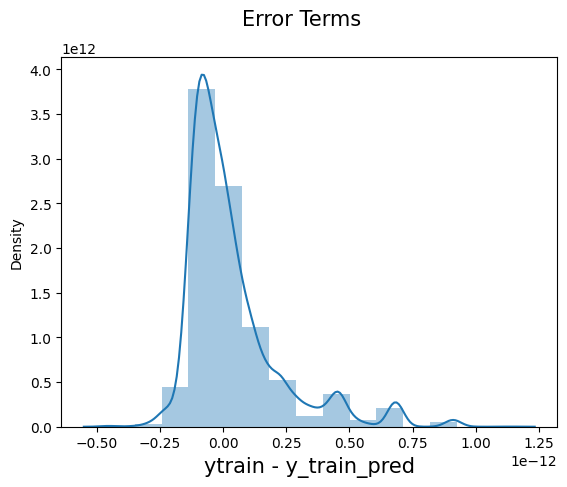

In [ ]:
y_train_pred = rfe.predict(xtrain)
res = (ytrain - y_train_pred)

fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('ytrain - y_train_pred', fontsize = 15)          # X-label
plt.show()

In [ ]:
predictions = rfe.predict(xtest)

In [ ]:
mean_squared_error(ytest, predictions)

3.4759231792805115e-26

In [ ]:
r2_score(ytest, predictions)

1.0

In [ ]:
### end of notebook